In [1]:
import json
import os
import pandas as pd
import numpy as np
import prettytable as pt
import warnings
warnings.filterwarnings("ignore")


###################################################################################################
                                                                                                  #
from rhoova.Client import *                                                                       #   
#Register and get api key from https://app.rhoova.com/ for ClientConfig("api key", "api secret")  #
config = ClientConfig("", "")                #                                                    #
api = Api(config)                                                                                 # 
                                                                                                  #
###################################################################################################


directory = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + os.pardir)
datadirectory=directory+"/data/yielddata/yielddata.csv"

yielddata = pd.read_csv(datadirectory)
yielddata = yielddata.replace(np.nan, '', regex=True) 




In [2]:

data = {
  "notional": 10000000,
  "valuationDate": "2021-03-10",
  "settlementDate": "2021-03-12",
  "oisDefinition": {
    "maturityDate": "2022-03-12",
    "startDate": "2021-03-12",
    "currency": "EUR",
    "frequency": "Monthly",
    "dayCounter": "Actual360",
    "businessDayConvention": "ModifiedFollowing",
    "maturityDateConvention": "ModifiedFollowing",
    "calendar": "TARGET",
    "dateGeneration": "Backward",
    "endOfMonth": True,
    "paymentLag": 1
  },
  "fixedLeg": {
    "payOrReceive": "Receive",
    "coupon":-0.00573250
  },
  "floatingLeg": {
    "spread": 0.0,
    "fixingDate": [],
    "fixingRate": []
  },
  "forecastCurve": {
    "settlementDays": 2,
    "intpMethod": "linear",
    "currency": "EUR",
    "calendar": "TARGET",
    "dayCounter": "Actual360",
    "period": "1D",
    "instruments": {
      "OIS": {
        "businessDayConvention": "ModifiedFollowing",
        "dayCounter": "Actual360"
      },
      "DEPO": {
        "businessDayConvention": "ModifiedFollowing",
        "dayCounter": "Actual360"
      }
    }
  },
  "discountCurve": {
    "settlementDays": 2,
    "intpMethod": "linear",
    "currency": "EUR",
    "calendar": "TARGET",
    "dayCounter": "Actual360",
    "period": "1D",
    "instruments": {
      "OIS": {
        "businessDayConvention": "ModifiedFollowing",
        "dayCounter": "Actual360"
      },
      "DEPO": {
        "businessDayConvention": "ModifiedFollowing",
        "dayCounter": "Actual360"
      }
    }
  },
  "yieldData":  yielddata.to_dict('r')
}
try:
    data = api.createTask(CalculationType.OIS, data, True)
    if(data["result"]):
        result=json.loads(data["result"])
    else:
        print(data["result"])
except RhoovaError as e:
    e.printPretty()

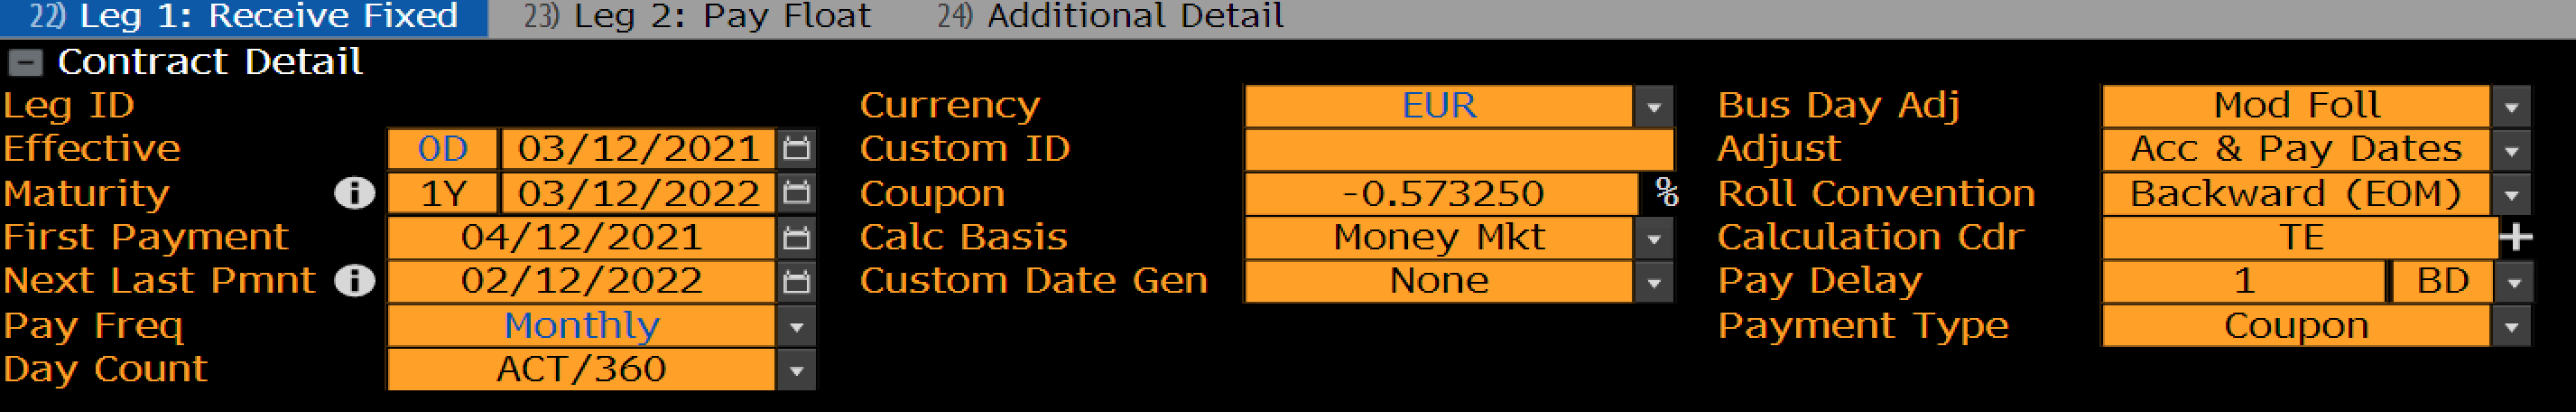

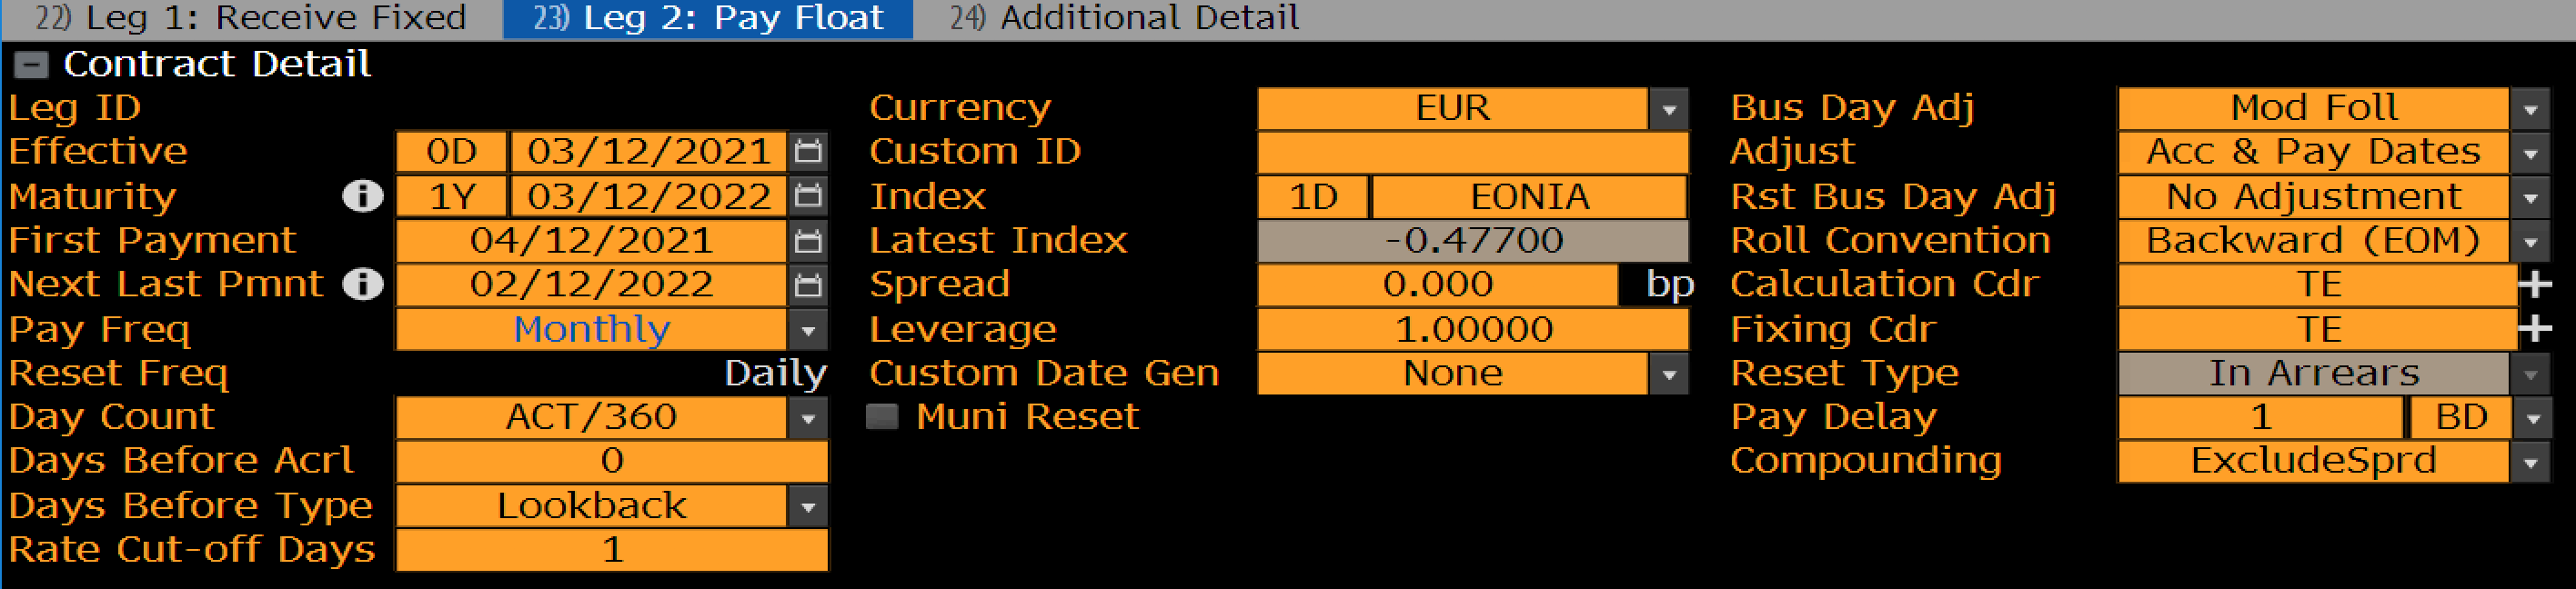

In [3]:
cashflow=pd.DataFrame(result.get('data'))

In [7]:
npvTable = pt.PrettyTable(['Parameters', 'Value'])
npvTable.add_row(['PV', result.get('pv')])
npvTable.add_row(['Fixed Leg PV', result.get('fixedLegPv')])
npvTable.add_row(['Floating Leg PV', result.get('oisLegPv')])
npvTable.add_row(['PV01', result.get('PV01')])
npvTable.add_row(['DVO1', result.get('DV01')])
npvTable.add_row(['Fair Rate', 100*result.get('fairRate')])
npvTable.add_row(['Fair Spread', 100*result.get('fairSpread')])
npvTable.add_row(['Implied Quote', 100*result.get('impliedQuote')])
npvTable.align = 'r'
npvTable.float_format = '.4'
print(npvTable)



+-----------------+-------------+
|      Parameters |       Value |
+-----------------+-------------+
|              PV |  -8497.2159 |
|    Fixed Leg PV | -58598.6023 |
| Floating Leg PV |  50101.3864 |
|            PV01 |   1022.2172 |
|            DVO1 |  -1022.2172 |
|       Fair Rate |     -0.4901 |
|     Fair Spread |     -0.0831 |
|   Implied Quote |     -0.0831 |
+-----------------+-------------+


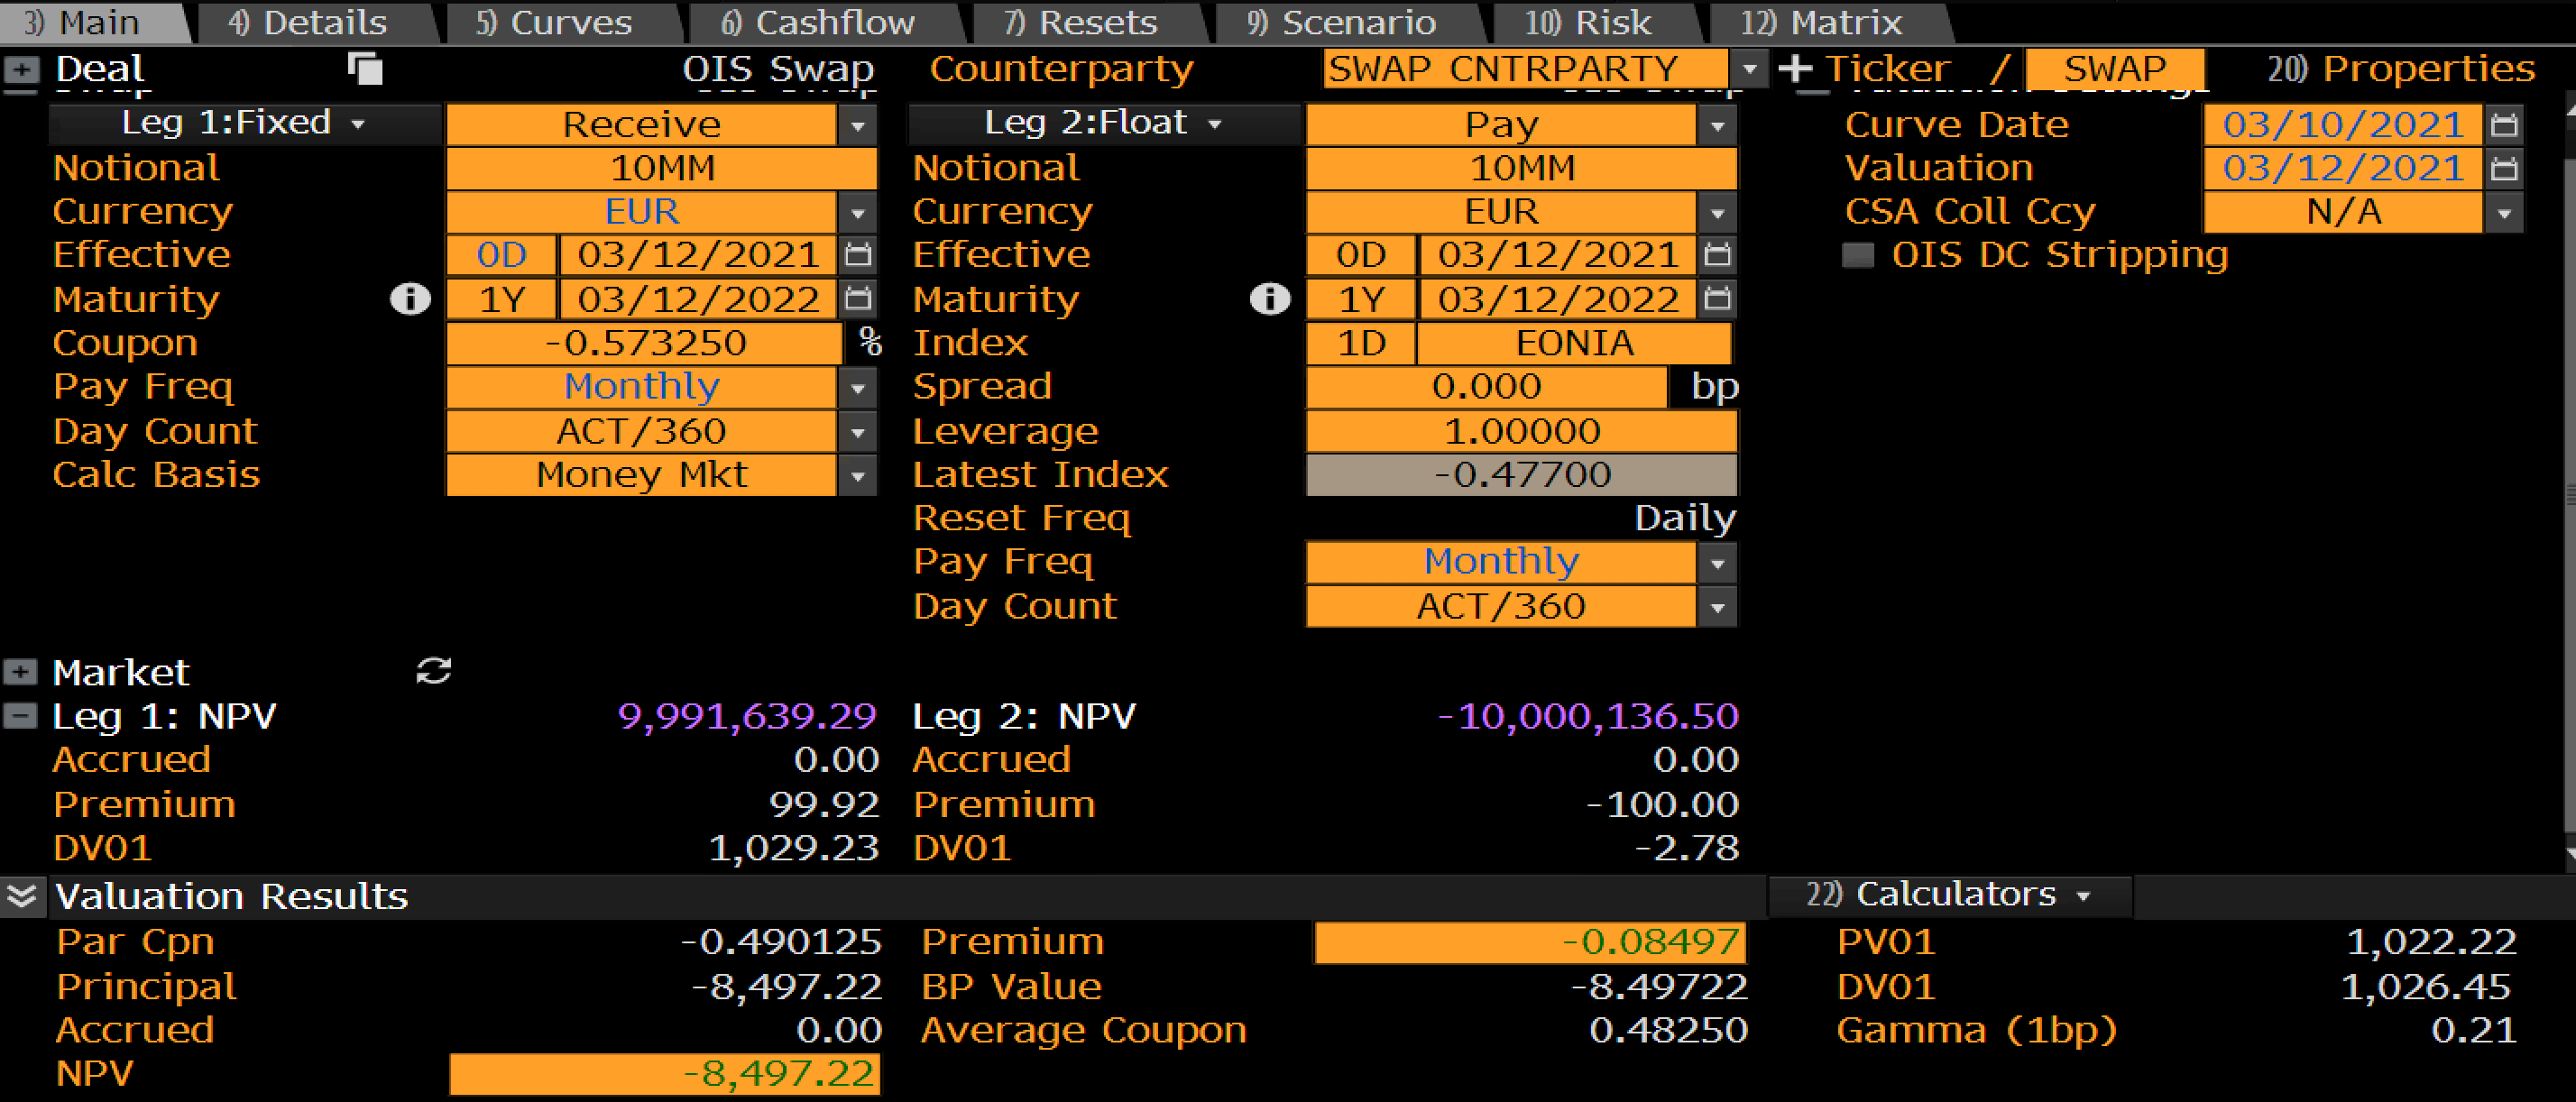

In [8]:
cashflow[cashflow["leg"]=="Fixed"]

,fixingDate,accrualStart,accrualEnd,notional,currency,leg,payOrReceive,instrument,rate,zeroRate,spread,termToMatByDay,termToMatByYear,cashflow,discountFactor,cashflowPv
0,2021-03-10,2021-03-12,2021-04-13,10000000,EUR,Fixed,Pay,Overnight Index Swap,-0.005732,-0.004827,0,32,0.088889,-4936.319444,1.000429,-4938.437705
1,2021-04-09,2021-04-13,2021-05-13,10000000,EUR,Fixed,Pay,Overnight Index Swap,-0.005732,-0.004842,0,62,0.172222,-4777.083333,1.000834,-4781.068620
2,2021-05-11,2021-05-13,2021-06-15,10000000,EUR,Fixed,Pay,Overnight Index Swap,-0.005732,-0.004844,0,95,0.263889,-5254.791667,1.001279,-5261.512531
3,2021-06-11,2021-06-15,2021-07-13,10000000,EUR,Fixed,Pay,Overnight Index Swap,-0.005732,-0.004859,0,123,0.341667,-4458.611111,1.001662,-4466.019800
4,2021-07-09,2021-07-13,2021-08-13,10000000,EUR,Fixed,Pay,Overnight Index Swap,-0.005732,-0.004870,0,154,0.427778,-4936.319444,1.002086,-4946.614698
5,2021-08-11,2021-08-13,2021-09-14,10000000,EUR,Fixed,Pay,Overnight Index Swap,-0.005732,-0.004881,0,186,0.516667,-5095.555556,1.002525,-5108.422988
6,2021-09-10,2021-09-14,2021-10-13,10000000,EUR,Fixed,Pay,Overnight Index Swap,-0.005732,-0.004889,0,215,0.597222,-4617.847222,1.002924,-4631.349047
7,2021-10-11,2021-10-13,2021-11-15,10000000,EUR,Fixed,Pay,Overnight Index Swap,-0.005732,-0.004888,0,248,0.688889,-4936.319444,1.003373,-4952.970230
8,2021-11-11,2021-11-15,2021-12-14,10000000,EUR,Fixed,Pay,Overnight Index Swap,-0.005732,-0.004890,0,277,0.769444,-4936.319444,1.003769,-4954.926231
9,2021-12-10,2021-12-14,2022-01-13,10000000,EUR,Fixed,Pay,Overnight Index Swap,-0.005732,-0.004903,0,307,0.852778,-4777.083333,1.004190,-4797.097547


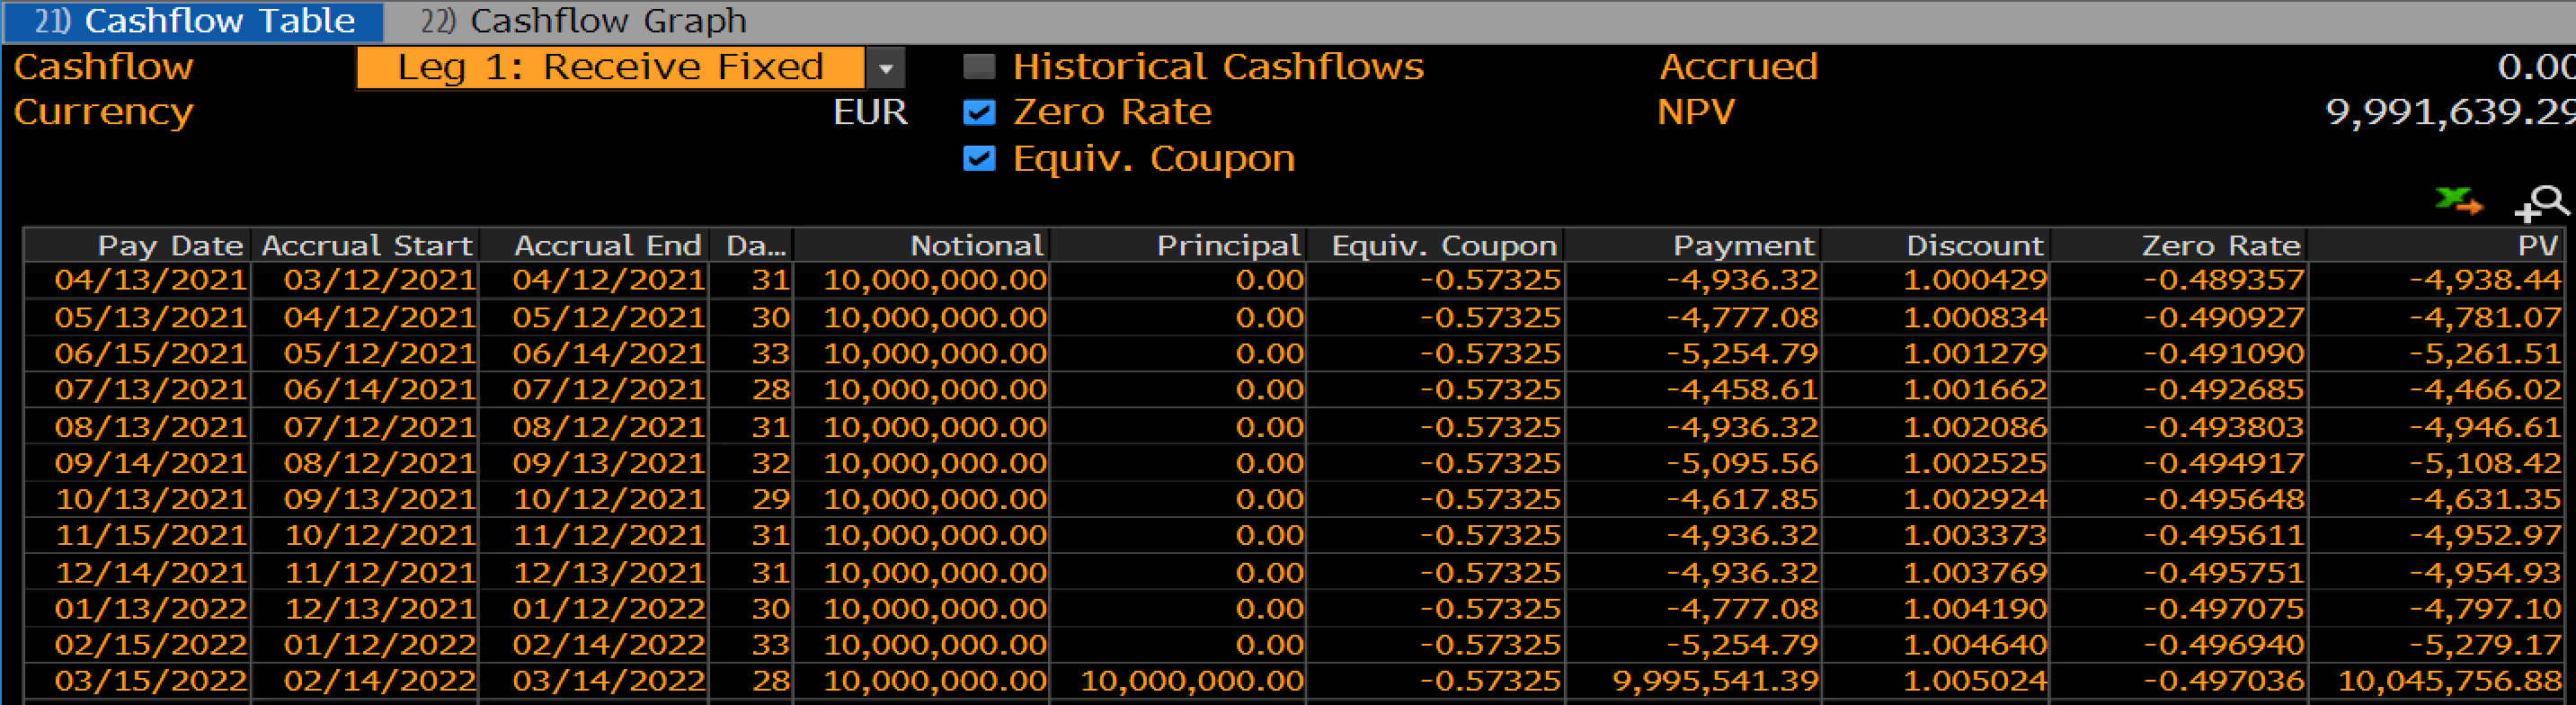

In [9]:
cashflow[cashflow["leg"]=="Floating"]

,fixingDate,accrualStart,accrualEnd,notional,currency,leg,payOrReceive,instrument,rate,zeroRate,spread,termToMatByDay,termToMatByYear,cashflow,discountFactor,cashflowPv
12,2021-03-10,2021-03-12,2021-04-13,10000000,EUR,Floating,Receive,Overnight Index Swap,-0.004826,-0.004827,0,32,0.088889,-4154.861111,1.000429,-4156.644034
13,2021-04-09,2021-04-13,2021-05-13,10000000,EUR,Floating,Receive,Overnight Index Swap,-0.004840,-0.004842,0,62,0.172222,-4047.931859,1.000834,-4051.308850
14,2021-05-11,2021-05-13,2021-06-15,10000000,EUR,Floating,Receive,Overnight Index Swap,-0.004841,-0.004844,0,95,0.263889,-4440.308213,1.001279,-4445.987355
15,2021-06-11,2021-06-15,2021-07-13,10000000,EUR,Floating,Receive,Overnight Index Swap,-0.004855,-0.004859,0,123,0.341667,-3820.105542,1.001662,-3826.453253
16,2021-07-09,2021-07-13,2021-08-13,10000000,EUR,Floating,Receive,Overnight Index Swap,-0.004865,-0.004870,0,154,0.427778,-4230.154341,1.002086,-4238.976807
17,2021-08-11,2021-08-13,2021-09-14,10000000,EUR,Floating,Receive,Overnight Index Swap,-0.004875,-0.004881,0,186,0.516667,-4384.899661,1.002525,-4395.972526
18,2021-09-10,2021-09-14,2021-10-13,10000000,EUR,Floating,Receive,Overnight Index Swap,-0.004881,-0.004889,0,215,0.597222,-3975.682133,1.002924,-3987.306373
19,2021-10-11,2021-10-13,2021-11-15,10000000,EUR,Floating,Receive,Overnight Index Swap,-0.004880,-0.004888,0,248,0.688889,-4205.509021,1.003373,-4219.694697
20,2021-11-11,2021-11-15,2021-12-14,10000000,EUR,Floating,Receive,Overnight Index Swap,-0.004880,-0.004890,0,277,0.769444,-4216.224772,1.003769,-4232.117260
21,2021-12-10,2021-12-14,2022-01-13,10000000,EUR,Floating,Receive,Overnight Index Swap,-0.004892,-0.004903,0,307,0.852778,-4188.587570,1.004190,-4206.136204


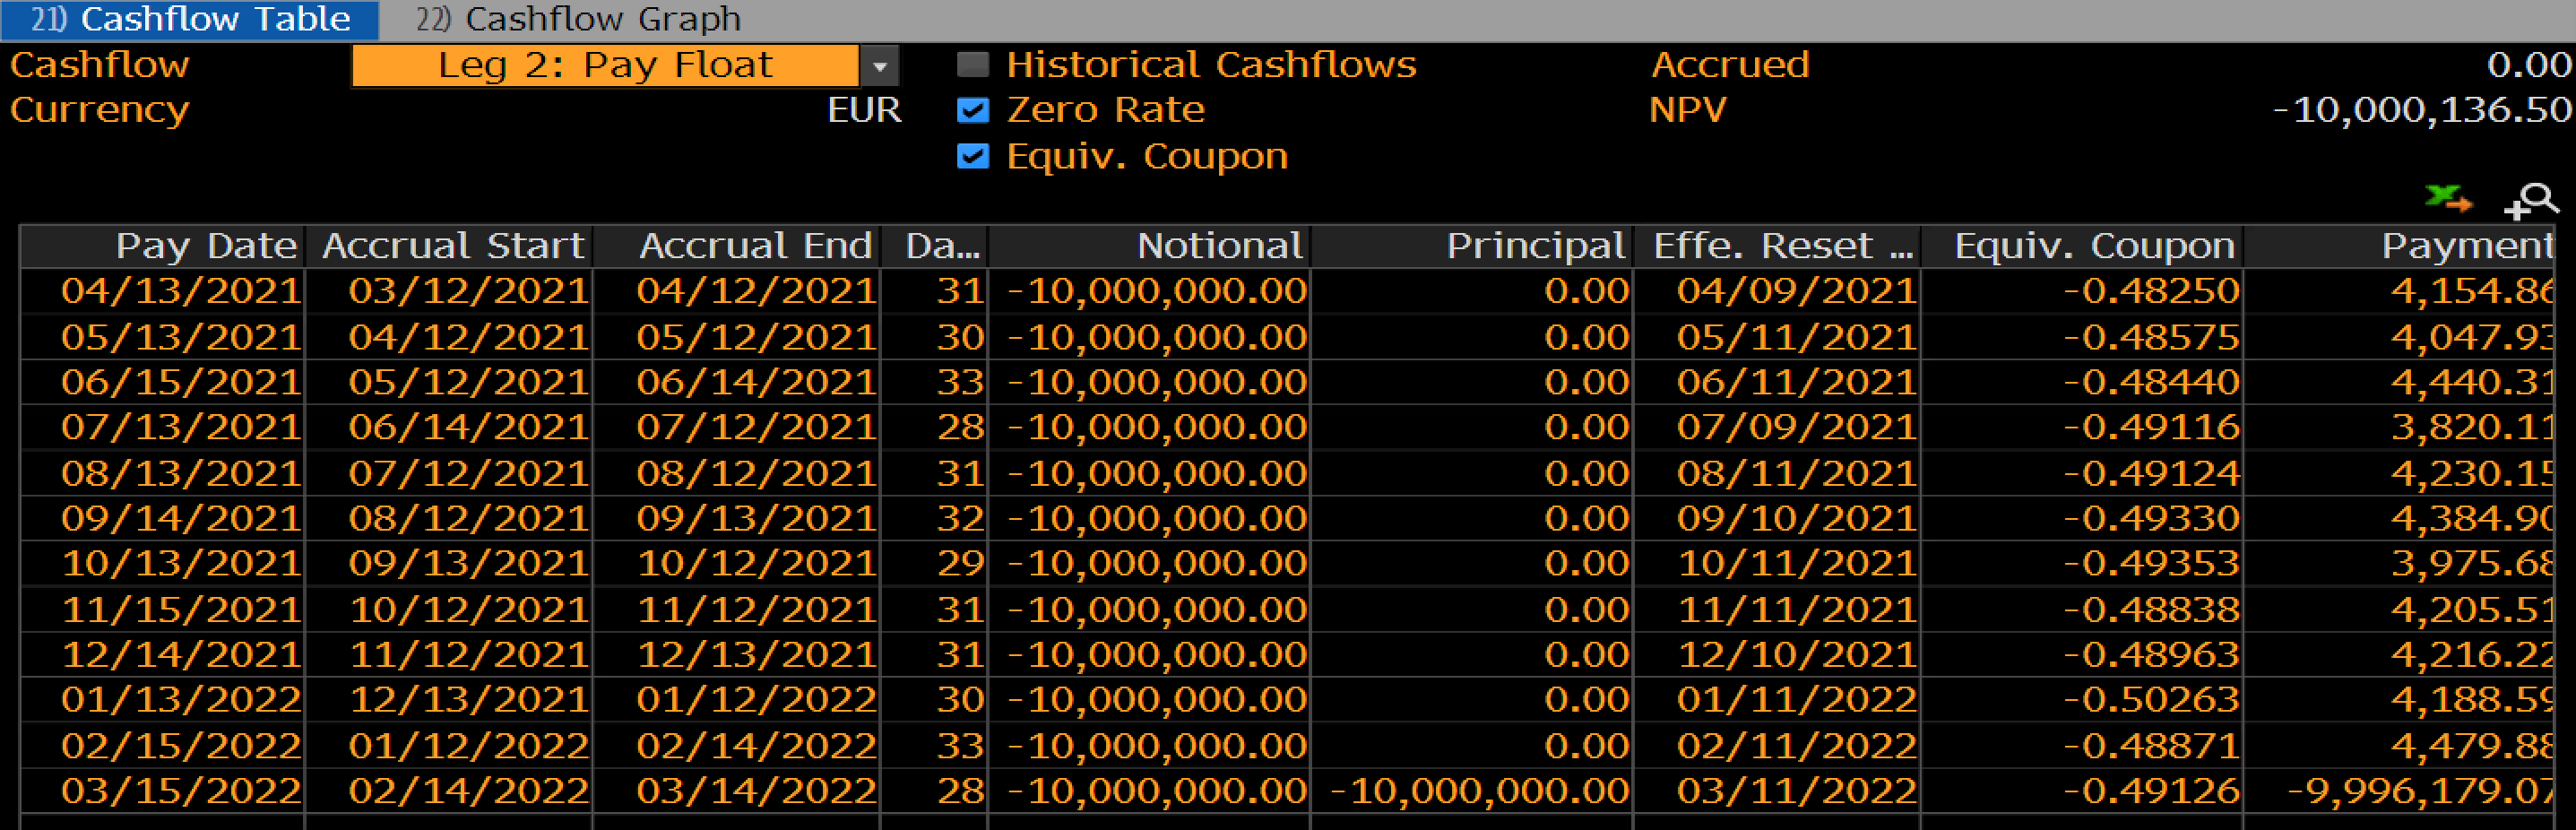

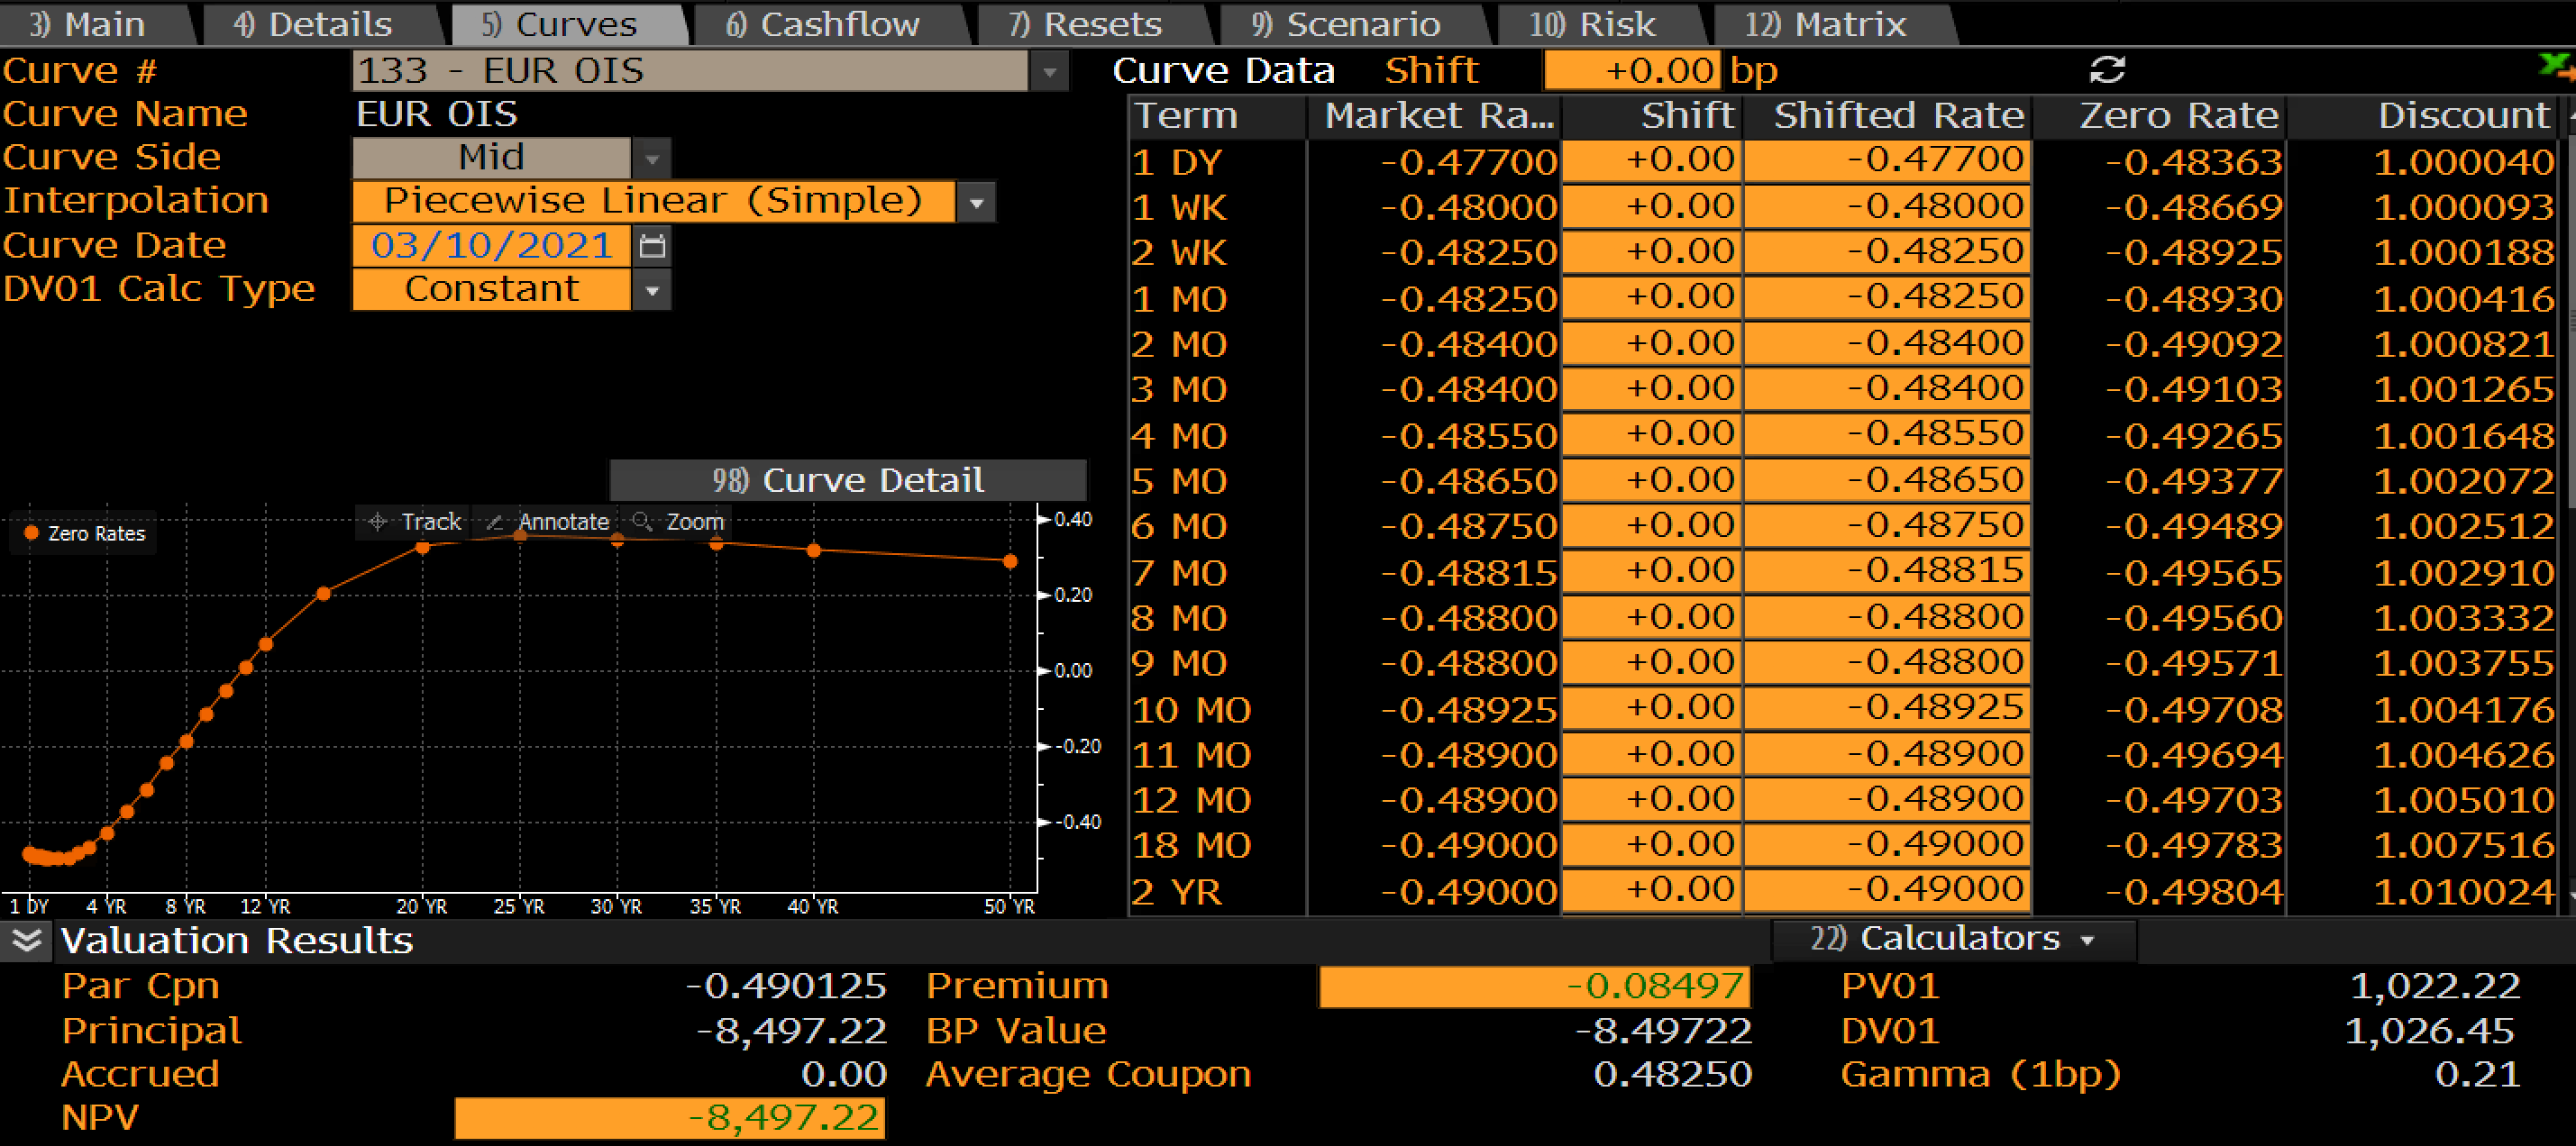